<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/BTlab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

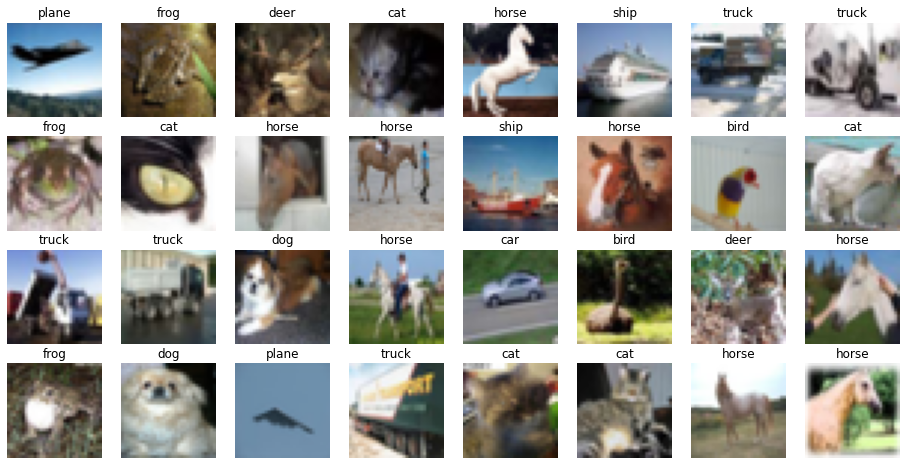

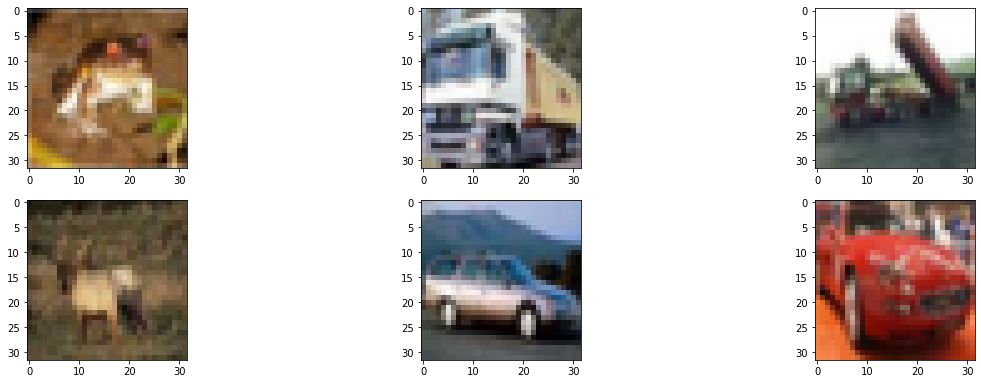

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               4194816   
                                                      

In [28]:
import matplotlib.pyplot as plt

# Import the CIFAR-10 dataset from keras' datasets
from keras.datasets import cifar10

# Import this PyPlot to visualize images
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.utils import shuffle

# Load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# show random images from training set
cols = 8 # Number of columns
rows = 4 # Number of rows

fig = plt.figure(figsize=(2 * cols, 2 * rows))
CIFAR10_CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Add subplot for each random image
for col in range(cols):
    for row in range(rows):
        random_index = np.random.randint(0, len(Y_train)) # Pick a random index for sampling the image
        ax = fig.add_subplot(rows, cols, col * rows + row + 1) # Add a sub-plot at (row, col)
        ax.grid(b=False) # Get rid of the grids
        ax.axis("off") # Get rid of the axis
        ax.imshow(X_train[random_index, :]) # Show random image
        ax.set_title(CIFAR10_CLASSES[Y_train[random_index][0]])# Set title of the sub-plot
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()
#import vào các layers và module cần thiết để xây dựng kiến trúc mạng neural
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#Chuyển đổi các giá trị pixel của tập dữ liệu thành kiểu float và sau đó chuẩn hóa tập dữ liệu
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
 
X_train=X_train/255.0
X_test=X_test/255.0
#Sử dụng one-hot encoding để xử lý dữ liệu
train_Y=np_utils.to_categorical(Y_train)
test_Y=np_utils.to_categorical(Y_test)
 
num_classes=Y_test.shape[1]
#Tạo mô hình sequential và thêm vào các layers
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#Xem tóm tắt để hiểu rõ hơn về kiến trúc mô hình
model.summary()
# Lưu lại mô hình
model.save("image_classification_20epoch.h5")
